In [14]:
import pandas as pd
from tqdm import tqdm

def calculate_betweenness_centrality_edges(adj_list):
    # initialize betweenness centrality for all edges to 0
    betweenness = {(u, v): 0.0 for u in adj_list for v in adj_list[u]}

    # iterate over all pairs of vertices and find the shortest path between them
    for source in adj_list:
        dist = {v: None for v in adj_list}
        dist[source] = 0
        queue = [source]
        paths = {v: [] for v in adj_list}
        num_paths = {v: 0 for v in adj_list}
        num_paths[source] = 1

        while queue:
            vertex = queue.pop(0)
            for neighbor in adj_list[vertex]:
                if dist[neighbor] is None:
                    dist[neighbor] = dist[vertex] + 1
                    queue.append(neighbor)
                if dist[neighbor] == dist[vertex] + 1:
                    num_paths[neighbor] += num_paths[vertex]
                    paths[neighbor].append(vertex)

        # calculate betweenness centrality for each edge as the sum of the fraction of shortest paths that pass through it
        dependencies = {v: 0.0 for v in adj_list}
        while paths:
            target, parents = paths.popitem()
            if parents:
                for parent in parents:
                    edge = tuple(sorted((parent, target)))
                    dependencies[parent] += (num_paths[parent] / num_paths[target]) * (1 + dependencies[target])
                    if target != source:
                        betweenness[edge] += dependencies[target] / 2

    # normalize betweenness centrality by dividing by the number of possible pairs of vertices
    num_pairs = (len(adj_list) * (len(adj_list) - 1)) / 2
    for e in betweenness:
        betweenness[e] /= num_pairs

    return betweenness


# load the graph from the csv file as an adjacency list
edges_df = pd.read_csv('edges_sampled_2K.csv')
adj_list = {}
for row in edges_df.itertuples(index=False):
    u, v = row
    if u not in adj_list:
        adj_list[u] = []
    adj_list[u].append(v)
    if v not in adj_list:
        adj_list[v] = []
    adj_list[v].append(u)

# initialize the number of communities to be 1
num_communities = 1

# perform edge removal based on betweenness centrality until the graph is partitioned into the desired number of communities
while True:
    # calculate the betweenness centrality of all edges
    betweenness = calculate_betweenness_centrality_edges(adj_list)

    # find the edge(s) with the highest betweenness centrality
    max_betweenness = max(betweenness.values())
    edge_indices = [i for i, e in enumerate(betweenness.values()) if e == max_betweenness]

    # remove the edge(s) with the highest betweenness centrality
    for u, v in list(adj_list.items()):
        adj_list[u] = [x for x in v if x not in edge_indices]
    adj_list = {u: v for u, v in adj_list.items() if v}

    # check if the graph is partitioned into the desired number of communities
    if len(list(adj_list.values())) == num_communities:
        break

    # increment the number of communities and continue edge removal
    num_communities += 1

# print the number of communities and the vertices in each
communities = list(adj_list.values())
for i, community in enumerate(communities):
    print(f'Community {i + 1}: {community}')

Community 1: [29697, 28142, 32909, 39063, 29151, 32939, 29097, 27340, 281, 19289, 8719, 26641, 20795, 9227, 26880, 26540, 27138, 19257, 26435, 26602, 26536]
Community 2: [27228, 29134, 44629, 33754, 30141, 33439, 33346, 5868, 6577, 11348, 18839, 6267, 10633, 26638, 26592, 22388, 16931, 26871, 29661, 29097, 26511, 26540, 19257, 26581, 27219, 23753, 23221, 26435, 4396, 29151, 26661]
Community 3: [27228, 27193, 26638, 26641, 27129, 16931, 27344, 26540, 26472, 26581, 27219, 25444, 37616, 36278, 29656, 29706, 29182, 26602]
Community 4: [27228, 26663, 23753]
Community 5: [27228, 26641, 3403, 26663, 26512, 34345, 29656]
Community 6: [27228, 10633, 2327, 8719, 26641, 11297, 16931, 27344, 26540, 27175, 26736, 26581, 27219, 25444, 23612, 76146, 29988, 29661, 29697, 33400, 38618, 30009, 29971, 32939, 30840]
Community 7: [27228, 281, 8719, 34319, 30826, 25444, 29151, 26602]
Community 8: [27228, 281, 18839, 6267, 19289, 27193, 14871, 10633, 26579, 8719, 13292, 27122, 26641, 9227, 14083, 33439, 3008

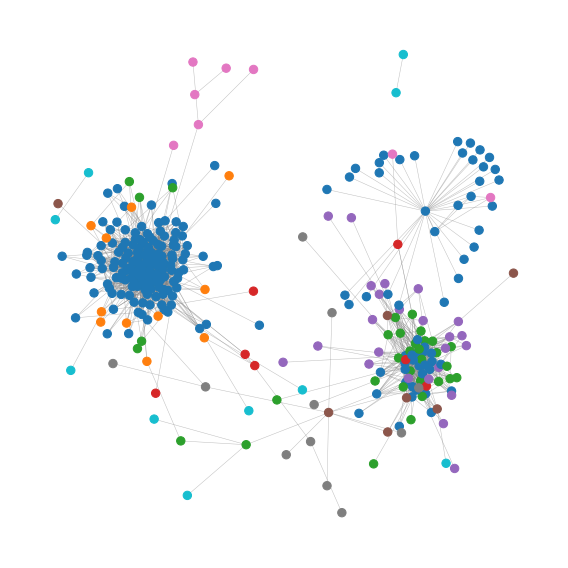

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

# convert adjacency list to NetworkX graph
G = nx.Graph(adj_list)

# set node colors based on community membership
colors = []
for node in G.nodes():
    for i, community in enumerate(communities):
        if node in community:
            colors.append(i+1)
            break

# plot the graph with node colors based on community membership
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, k=0.2, seed=42) # adjust k to spread out or pull in the nodes
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab10, node_size=70, node_shape='o')
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=0.5)
nx.draw_networkx_labels(G, pos, labels={}, font_size=10, font_family='sans-serif', font_weight='bold', alpha=0.8)
plt.axis('off')
plt.tight_layout()
plt.show()

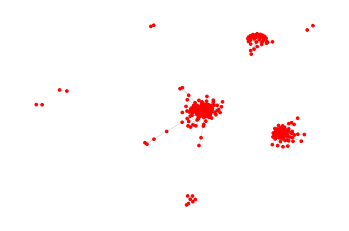

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def calculate_betweenness_centrality_edges(adj_list, threshold=6):
    # initialize betweenness centrality for all edges to 0
    betweenness = {(u, v): 0.0 for u in adj_list for v in adj_list[u]}

    # iterate over all pairs of vertices and find the shortest path between them
    for source in adj_list:
        dist = {v: None for v in adj_list}
        dist[source] = 0
        queue = [source]
        paths = {v: [] for v in adj_list}
        num_paths = {v: 0 for v in adj_list}
        num_paths[source] = 1

        while queue:
            vertex = queue.pop(0)
            for neighbor in adj_list[vertex]:
                if dist[neighbor] is None:
                    dist[neighbor] = dist[vertex] + 1
                    queue.append(neighbor)
                if dist[neighbor] == dist[vertex] + 1:
                    num_paths[neighbor] += num_paths[vertex]
                    paths[neighbor].append(vertex)
            
            # add a threshold to limit the number of shortest paths considered for each source vertex
            if dist[vertex] >= threshold:
                break

        # calculate betweenness centrality for each edge as the sum of the fraction of shortest paths that pass through it
        dependencies = {v: 0.0 for v in adj_list}
        while paths:
            target, parents = paths.popitem()
            if parents:
                for parent in parents:
                    edge = tuple(sorted((parent, target)))
                    dependencies[parent] += (num_paths[parent] / num_paths[target]) * (1 + dependencies[target])
                    if target != source:
                        betweenness[edge] += dependencies[target] / 2

    # normalize betweenness centrality by dividing by the number of possible pairs of vertices
    num_pairs = (len(adj_list) * (len(adj_list) - 1)) / 2
    for e in betweenness:
        betweenness[e] /= num_pairs

    return betweenness

# load the graph from the csv file as an adjacency list
edges_df = pd.read_csv('edges_sampled_2K.csv')
adj_list = {}
for u, v in edges_df.itertuples(index=False):
    adj_list.setdefault(u, []).append(v)
    adj_list.setdefault(v, []).append(u)

# calculate the betweenness centrality of all edges
betweenness = calculate_betweenness_centrality_edges(adj_list)

# find the top 6 edges with the highest betweenness centrality
top_edges = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:6]

# remove the top 6 edges with the highest betweenness centrality
for (u, v), _ in top_edges:
    adj_list[u].remove(v)
    adj_list[v].remove(u)

# plot the resulting graph with each community represented by a different color
G = nx.Graph(adj_list)
pos = nx.spring_layout(G, seed=42)
color_map = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
nx.draw_networkx(G, pos=pos, node_color=[color_map[i%num_communities] for i in range(len(G.nodes()))], with_labels=False, node_size=7, width=0.1, edge_color='black')
plt.axis('off')
plt.show()

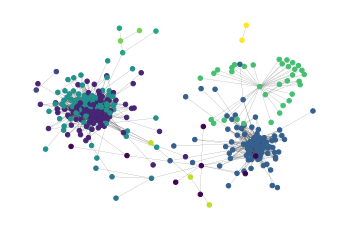

In [71]:
import community

# detect the communities using the Louvain algorithm
partition = community.best_partition(G)

# assign a unique color to each community
color_map = [partition[node] for node in G.nodes()]

# plot the resulting graph with each community represented by a different color
nx.draw_networkx(G, pos=pos, node_color=color_map, with_labels=False, node_size=20, width=0.1, edge_color='black')
plt.axis('off')
plt.show()